In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [3]:
print('train data=', len(x_train_image))
print('test data=', len(x_test_image))

train data= 60000
test data= 10000


In [4]:
print('x_train_image:', x_train_image.shape)
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [5]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

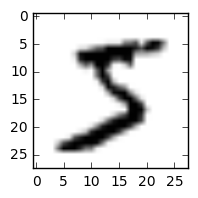

In [6]:
plot_image(x_train_image[0])

In [7]:
y_train_label[0]

5

In [8]:
#查看数字图像，，真实的数据及预测结果
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if(len(prediction) > 0):
            title += ", predict=" + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()

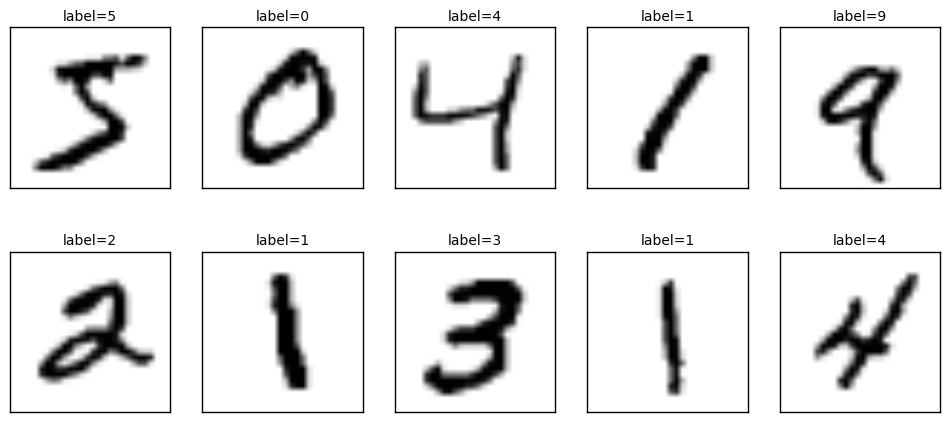

In [9]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)

In [10]:
print('x_test_image:', x_test_image.shape)
print('y_test_label:', y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


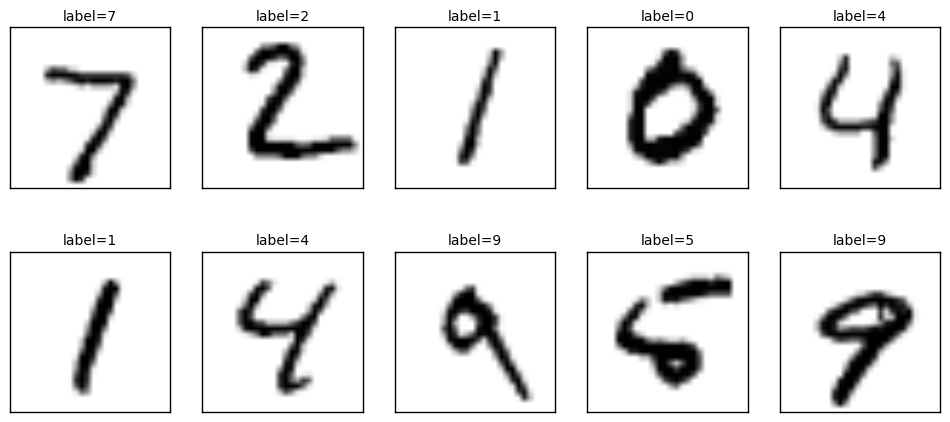

In [11]:
plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 10)

In [12]:
print('x_train_image:', x_train_image.shape)
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [14]:
#用shape转换成一维向量，在用astype转换为float
x_train = x_train_image.reshape(60000, 784).astype('float')
x_test = x_test_image.reshape(10000, 784).astype('float')

In [15]:
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [16]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
#将image标准化
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [20]:
x_train_normalize[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [21]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
#执行one-hot encoding转换
y_train_one_hot = np_utils.to_categorical(y_train_label)
y_test_one_hot = np_utils.to_categorical(y_test_label)

In [24]:
y_train_one_hot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])